In [167]:
%run prelude.py
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)
def parse_line(l):
    return int(b), float(v)

from collections import *
FILENAME="../datasets/api_latencies_24x1h.tsv"
D = defaultdict(list)
with open(FILENAME) as fh:
    for line in fh:
        # line = "3 232.123321" -- hour latency
        a, b = line.split("\t")
        D[int(a)].append(float(b))

# Descriptive Statistics

# (0) Counting Values

or the Empirical Distribution Function

# (1) Mean Values

The _mean value_ of $X=[x_1, \dots, x_n]$ is defined as

$$ \mu = mean(X) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative

In [8]:
# Computation of the mean value
def mean(X):
    return float(sum(X)) / len(X)

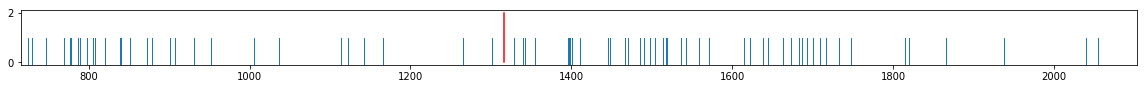

In [50]:
H("Example: Request Rates")
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plt.figure(figsize=(20,1))
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)
plt.show()

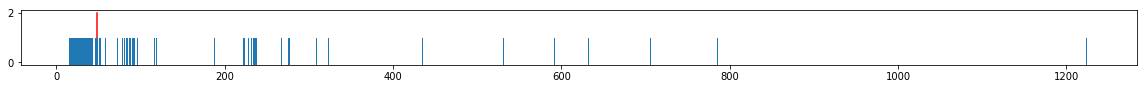

In [48]:
H("Example: WebLatency")
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plt.figure(figsize=(20,1))
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)
plt.show()

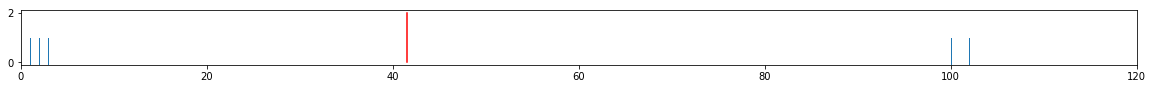

In [47]:
H("Mean values can be atypical")
X=[1,2,3,100,102]
plt.figure(figsize=(20,1))
plt.xlim(0,120)
plt.plot([mean(X),mean(X)],[0,2],'r-')
sns.rugplot(X,height=.5)
plt.show()

## Properties

* Mean values are not robust, a single outlier can skew the mean heavily.

* Mean values are mergable, if considered along with the count.


# Applications

* Main rollup aggregate used everywhere
* Used a lot for Graphing
* Caution with Spike Erosion: https://www.circonus.com/2016/01/spike-erosion/
*  "Because looking at your average response time is like measuring the average temperature of a hospital. What you really care about is a patient’s temperature, and in particular, the patients who need the most help." - Dogan Ugurlu - https://blog.optimizely.com/2013/12/11/why-cdn-balancing/


# (2) Median Vaules

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \lt m \} = \# \{ i \,|\, x_i \gt m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).
  
Remark:

* A Median always exists
* Median is not always unique
* Less "precise" then the mean for well behaved datasets

# The central median

Medians can be computed by sorting the dataset.

`S = sorted(X)`

Consider the following cases:

- if `len(X)` is odd, then `S[(len(X)-1)/2]` is the (unique and) central median.
- if `len(X)` is even, then all values between `S[len(X)/2-1]` and `S[len(X)/2]` are median values.  
  The central median is defined as the mean of those two values.

We write $median(X)$ for the central median of $X$.

Example:
* `median([1,2,3]) = 2`
* `median([1,2]) = (1 + 2) / 2`

## Properties

* Median values are robust, a single outlier not affect a median much.

* Median values are not mergable.

In [19]:
# Computation of the median
def median_range(X):
    S = sorted(X)
    n = len(X)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

def median(X):
    a,b = median_range(X)
    return (a+b)/2

In [20]:
def plot_median_range(X):
    plt.figure(figsize=(14,1))
    a, b = median_range(X)
    c = (a+b)/2.
    sns.rugplot(X, color="green", height=0.5)
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([c,c],[0.5,1],'r-')
    plt.plot([a,b],[0.5,0.5],'r--')
    plt.title("Median Range: {:.3f} .. {:,.3f}".format(a,b))
    plt.ylim([0,1])

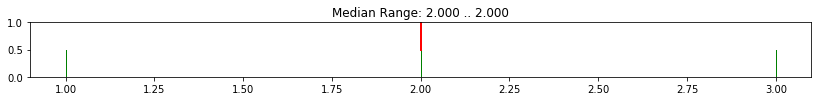

In [21]:
plot_median_range([1,2,3])

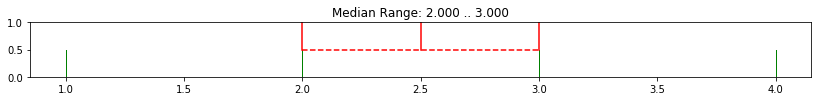

In [22]:
plot_median_range([1,2,3,4])

# Examples: Median

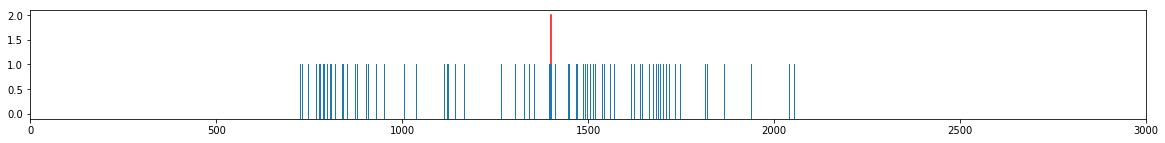

In [52]:
H("Example: Median Request Rate")
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plt.figure(figsize=(20,2))
plt.xlim(0,3000)
plt.plot([median(X),median(X)],[0,2],'r-')
sns.rugplot(X,height=.5);

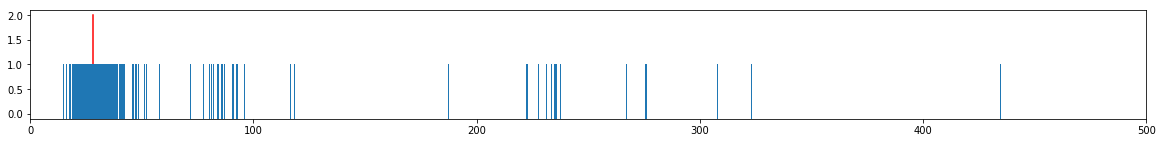

In [54]:
H("Example: Median WebLatency")
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plt.figure(figsize=(20,2))
plt.xlim(0,500)
plt.plot([median(X),median(X)],[0,2],'r-')
sns.rugplot(X,height=.5);

# Aside: Truncated Means

* Truncated means "interpolate" between means and medianse.
* In many cases they provid the increased "precision" of means, while keeping the robustnes against outliers.

To arrive at the k-truncated mean of a dataset X, perform the following steps:
* Remove a minimum and a maximum value from X, a total of k times.
* The remaining samples are called the k-truncation of X and denoted by $T_k X$.
* Caculate the mean value of the remaining samples.

We deonte the k-truncated mean by `tmean(X,k)`.

In [30]:
def tmean(X,k):
    X = list(X)
    k = int(k)
    if len(X) <= 2*k:
        return None
    for i in range(k):
        X.remove(max(X))
        X.remove(min(X))
    return mean(X)

In [31]:
# Truncated mean examples
print(tmean([1,2,3,5,100],0))
print(tmean([1,2,3,5,100],1))
print(tmean([1,2,3,5,100],2))

22.2
3.3333333333333335
3.0


In [34]:
# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean_median(X, title):
    plt.figure(figsize=(14,1))
    plt.title(title)
    H(title)
    sns.rugplot(X, color='grey', height=0.5)
    mark(mean(X));                     print("mean:        {:4.2f} (red)".format(mean(X)))
    k = int(math.ceil(10*len(X)/100.))
    mark(tmean(X,k), style='b');       print("tmean(X,{:2}): {:4.2f} (blue)".format(k,tmean(X,k)))
    mark(median(X), style='g');        print("median:      {:4.2f} (green)".format(median(X)))
    plt.show()

# Comparison of Centrality Measures

mean:        -0.02 (red)
tmean(X,50): -0.03 (blue)
median:      -0.04 (green)


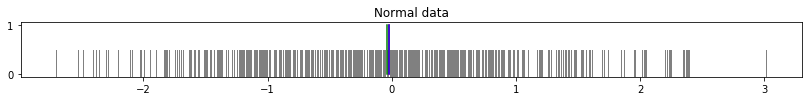

mean:        1316.31 (red)
tmean(X, 8): 1315.61 (blue)
median:      1399.66 (green)


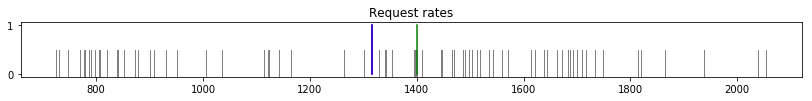

mean:        45.77 (red)
tmean(X,10): 30.52 (blue)
median:      29.10 (green)


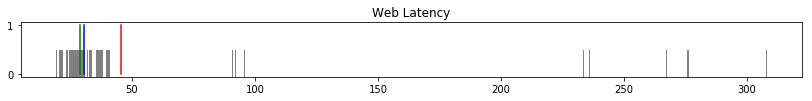

In [35]:
Z = [ np.random.normal() for x in range(500) ]
plot_mean_median(Z, "Normal data")

X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plot_mean_median(X, "Request rates")

Y = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plot_mean_median(Y[0:100], "Web Latency")

# (3) Percentiles

The definition is a little involved so cover examples first

* The minimum is a 0%-percentile
* A median is a 50%-percentile
* The maximum is a 100%-percentile
* Quartiles: $0,25,50,75,100$-percentiles
* Quantiles: The $r$-quantile is the $r \times 100$-percentile $0<r<1$.

# General Definition of Percentiles

Pick a number $0\leq p \leq 100$. The (empirical) $p$%-percentile for $X$ is a value $y$ such that,

$$ \#\{i \,|\, X[i] \lt y \} \leq \frac{p}{100} \cdot n $$

and

$$ \#\{i \,|\, X[i] \gt y \} \leq \frac{100-p}{100} \cdot n $$

Roughly speaking, $y$ divides $X$ in $p\%$ samples that are lower than $y$ and $(100-p)\%$ samples that are larger than $y$.

Remarks:

* Percentiles always exists
* Non unique (like median)
* Multiple ways to pick a single value

# The Hyndman Fan List

There are many ways to define percentiles used in the wild.
Exhausive list by Hyndman-Fan, published in 1996.

> [1] Hyndman, R. J. and Fan, Y. (1996) Sample quantiles in statistical packages, American Statistician 50, 361–365. 10.2307/2684934

The percentiles we defined above are Type 1 percentiles in the Hydnam-Fan list.

From the perspective of Probablity Theory, this is the most natural definition.

In [160]:
from math import *
def PE_range(p, X):
    q = p/100.0
    X = sorted(X)
    n = len(X)
    restrict = lambda x : max(1, min(n, x))
    a = restrict(ceil(q*n))
    b = restrict(floor(q*n) + 1)
    return (X[a-1], X[b-1])

def PE(p,X):
    x,y = PE_range(p,X)
    return (x+y)/2

In [161]:
def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')

def plot_percentile_range(p,X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = emp_percentile_range(p,X)
    mark_range(a,b)
    plt.title("{:n}%-Percentile Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

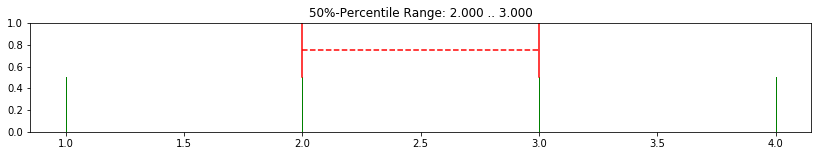

In [162]:
plot_percentile_range(50,[1,2,3,4])

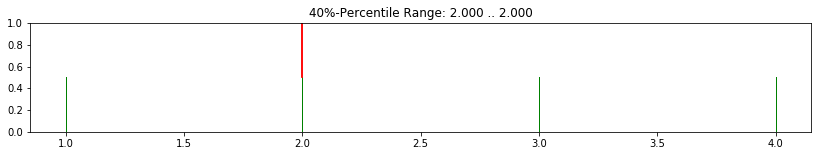

In [163]:
plot_percentile_range(40,[1,2,3,4])

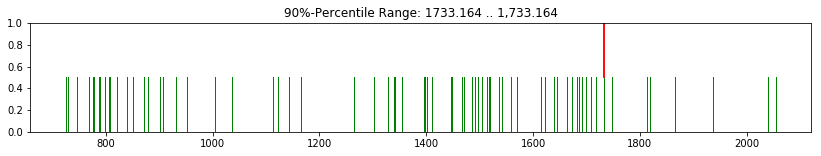

In [164]:
H("Example Request Rates p90")
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
plot_percentile_range(90, X)

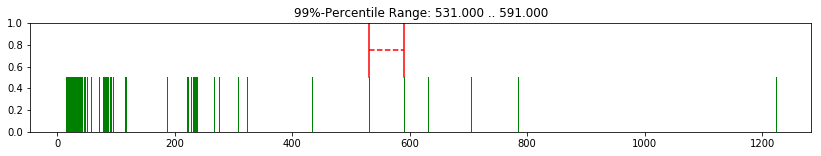

In [165]:
H("Example: WebLatency p99")
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plot_percentile_range(99, X)

-> make this unique by picking an odd number of samples

# The Percentile Function

We can consider the percentile as a function in p

In [203]:
def p_plot(X, *args):
    P = np.linspace(0, 100, 100)
    plt.plot([PE(p, X) for p in P], *args)

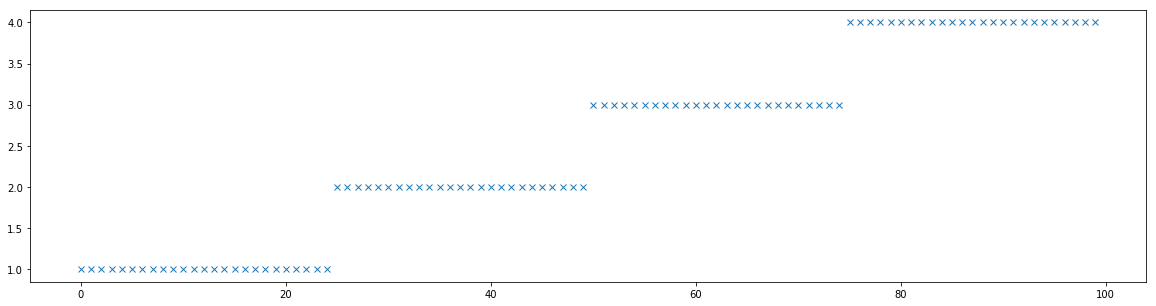

In [204]:
p_plot([1,2,3,4],"x")

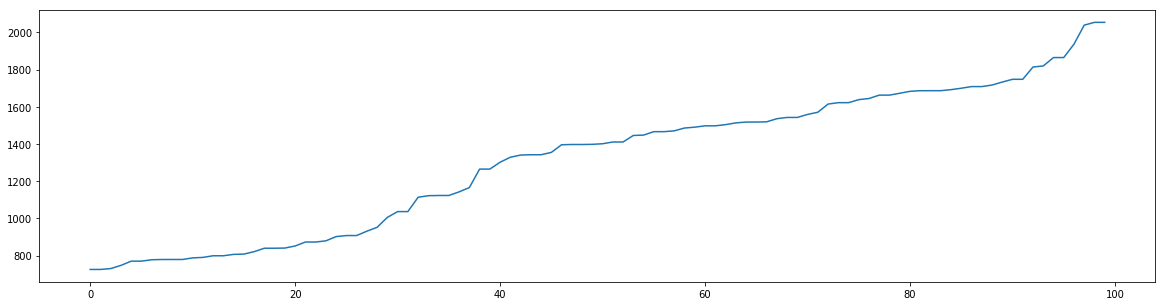

In [205]:
H("Request Rates")
X = np.loadtxt("../datasets/RequestRates.csv", delimiter=",")[:,1]
p_plot(X)

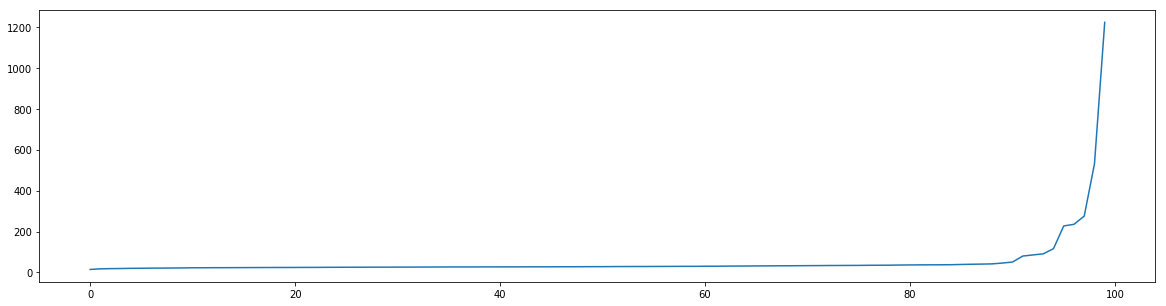

In [206]:
H("Web Latencies")
X = np.genfromtxt("../datasets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
p_plot(X)

# Excursion: Percentiles and Distribution Functions

## Excursion: Resampling data with Percentiles

It's possible to use the percentile function to generate a dataset with the same distribution as X:

Choose p in [0,100] uniformly random, then y = PE(p, X) is a random variable distributed like X.

A similar method is known as _bootstrap_, where one chooses (usually $\# X$) random values from X itself.

**Exercise**: Show that for empirical percentiles, the Percentile Resampling of #X samples and Bootstrap give the same result.

In [207]:
def resample(X,n):
    return [ PE(np.random.uniform(0,100), X) for i in range(n) ]

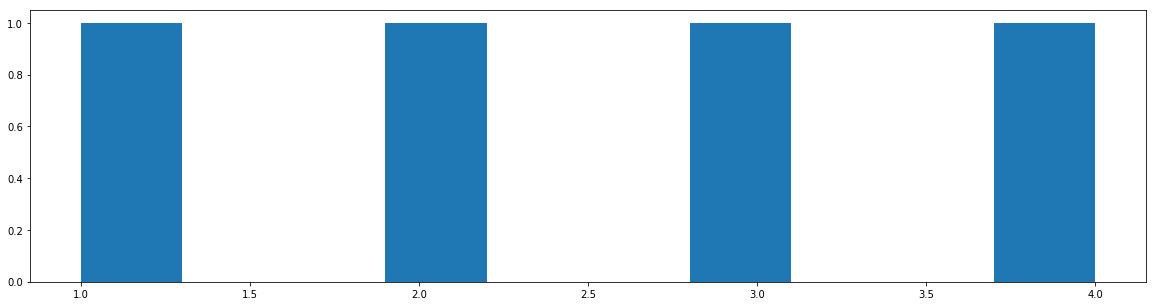

In [208]:
X = [1,2,3,4]
plt.hist(X);

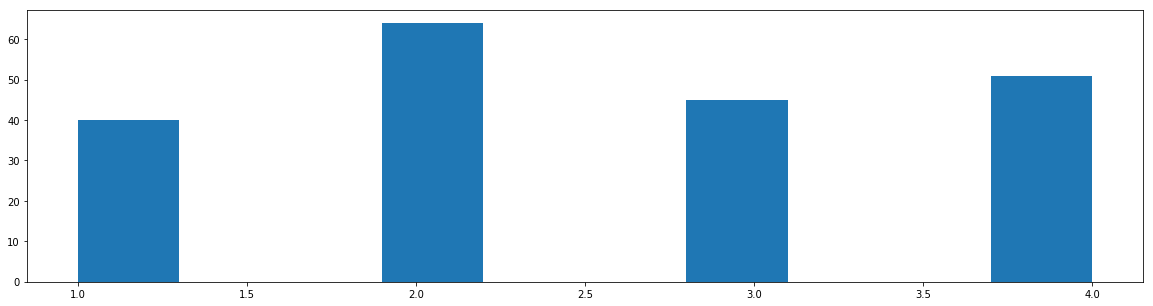

In [209]:
XR = resample([1,2,3,4], 200)
plt.hist(XR);

# Type 7 percentiles

A slighyly different definition of quantiles is dominant in the Software industry, is the Type-7 percentile from the Hydman-Fan list.

Starting from the observation that:

*  $$ p(0,X) = min(X) = SX[1]$$

*  $$ p(100,X) = max(X) = SX[n] $$

where $SX$ is a sorted version of X.

The function:

$$ k(p) = \frac{p}{100} \cdot (\#X - 1) + 1$$

interpolates between $k(0) = 1$ and $k(100) = n$.

We define the Type-7 percentile range as:

$$  P^7_-(X,p) = SX[ floor(k(p)) ], \quad P^7_{+}(X,p) = SX[ ceil(k(p)) ]. $$

The interpolated Type-7 percentile, the unique piecewise linear function that interpolates between those values.


In [155]:
def P7_range(p, X):
    # assumes X to be sorted
    q = p/100.0
    n = len(X)
    a = floor((n-1) * q)
    b = ceil((n-1) * q)
    return X[a],X[b]

def P7(p, X):
    # assumes X to be sorted
    q = p/100.0
    n = len(X)
    a = floor((n-1) * q)
    b = ceil((n-1) * q)
    t = (n-1) * q - floor((n-1) * q)
    return X[a] * (1-t) + X[b] * (t)

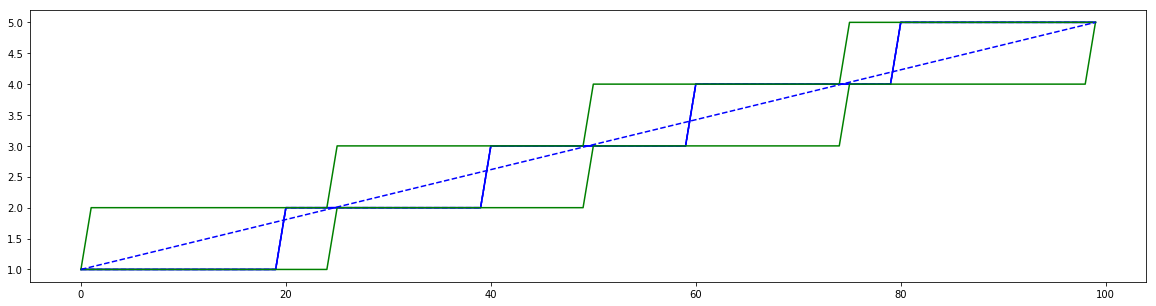

In [156]:
X = [1,2,3,4,5]
P = np.linspace(0,100,100)
plt.figure(figsize=(20,5))
plt.plot( [PE_range(p, X) for p in P], color="blue")
plt.plot( [PE(p, X) for p in P], "--", color="blue")
plt.plot( [P7_range(p, X) for p in P], color="green")
plt.plot( [P7(p, X) for p in P], "--", color="blue")

# Properties

* Percentiles are robust.
* Precentiles are not mergable (except: min/max)

# Applications

* Service Level Monitoring: p99, p95 ([Dynamo paper](https://www.allthingsdistributed.com/2007/10/amazons_dynamo.html))

* Deviation measures (cf. next section)

# Aggregating Percentiles

# Percentiles can't be Aggregated

* Blog: www.circonus.com/problem-math/

* Twitter: https://twitter.com/heinrichhartman/status/748562001392111617

* Reddit: https://www.reddit.com/r/devops/comments/941n2k/tsdbs_at_scale_part_one/e3po8d3/

# Summary:

| Statistic | Mergable | Robust |
|--|--|--|
| count | yes | yes |
| mean  | yes | no  |
| median | no | yes |
| truncated mean | no | yes |
| max/min | yes | no |
| percentile | no | yes |

It looks like you have to choose between robust and mergable statistics.